# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\dejavu\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


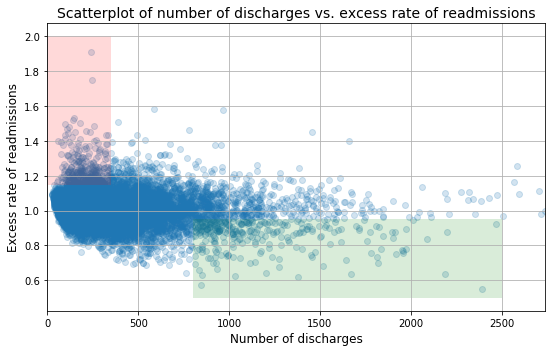

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

**QUESTION A**

**Do you agree with the above analysis and recommendations? Why or why not?**

- I do not agree. This is because scatterplots are usually used to display association between scalar numerical variables. That said, correlation does not necessary mean causation. Without an experimental study, one cannot firmly conclude causation.

- The scatterplot gives an idea of the relationship, but one cannot really say how much significant that is, seeing that about 50% of the data points lie between the 0.8 and 1.2 Excess rate of readmissions. A better approach is to use a more quantitative approach than this.

**QUESTION B**

From the above we see that the linear association between hospital capacity (number of discharges) and readmission rates is weak, which somewhat contradicts the conclusion of th. The r_row of -0.093 is much closer to zero than to -1. This signifies a very weak linear negative association between the variables, which agrees with my point number 2. 

**B.1: Setup an appropriate hypothesis test.**

Conditions and assumptions that needs to be considerated
 - Since the standard deviation of the population was not given or is not known, a T-Test is appropriate. 
 - Because we are comparing population means of two variables or populations for the observation units, a 2-Sample T-Test is approriate
 - The two variables measured on the observational units are considered independent. With independence meaning that measured values are not repeated on same observational units and have not conditional relationship between them
 - Both variables in question are assumed to be normally distributed to allow the utilization of the p-value
 - And that the measured or collected data were randomly sampled to mitigate any bias


Having said all that, the hypothesis testing used are as shown below: 

**Step 1**

Ho = There is no difference between the population means of the overall number of discharges and excessive readmission rates.

Ha = There is a difference between the population means of the overall number of discharges and excessive readmission rates.



**B.2: Compute and report the observed significance value (or p-value).**

In [7]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(x, y, equal_var=False) 
print('p-value:', p_value)

p-value: 0.0


**B.3: Report statistical significance for  α  = .01.**

Since the p-value of 0.0 is less than the significant level α = 0.01, we reject the null hypothesis Ho, reporting that there is statistically significant difference between the overall number of discharges and excessive readmission rates.

**B.4:**

**A - Discuss statistical significance and practical significance.?** 

Statistical significance is the likelihood that findings from the research or experimental study are meaningful or that measured results are truly present, and not due to chance or other random effect. The process of evaluating significance arises when trying to make inference on a population parameter from a sample using a point estimate, mostly because it's not feasible getting access to the overall population in question. A null hypothesis that needs disproval is stated, and an alternative hypothesis just like we already did above with a target significance level. The significance level is an expression of how rare ones results are, under the assumption that the null hypothesis is true and are usually selected based on business need. Mostly at α = 0.05. Sample data is collected, and a test statistics calculated to enable estimation of a p-value.  The lower the p-value, the less likely the results are due purely to chance.

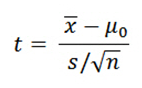

Depending on if the standard deviation of the population mean is known, one would either be working with the t-test or a z-test. The formula above is used to calculate the t-statistic, which can be seen as signal to noise ratio. The numerator is referred to as the effect size or signal that compares the sample mean to population mean in the null hypothesis, while denominator is the noise made up of the standard deviation s, and the sample size. This t-statistic or test-statistic follow a distribution that tends towards perfect normality of a bell shaped as the sample size increases. This is best described by the central limit (CLT) theorem in that the sample mean distribution drawn from a population that may not be normal will tend towards a normal distribution for increasing or large sample size. In that distribution, t-statistics are plotted horizontally and probability density vertifically making it possible for a p-value to be estimated.  

Statistical significance itself doesn't imply that your results have practical consequence. If you use a test with very high power, you might conclude that a small difference from the hypothesized value is statistically significant. However, that small difference might be meaningless to your situation. You should use your specialized knowledge to determine whether the difference is practically significant.


Real differences between the point estimate and null value are easier to detect with larger samples. However, a very large sample  will result in statistical signiificance even for tiny differences between the sample mean and the null value (effect size), even when the difference is not practically significant.

**B.5: Look at the scatterplot above.**

** A - What are the advantages and disadvantages of using this plot to convey information?**

**Advantages**
- It somewhat shows trend in the data relationship
- Retains exact data value sand sample size
- Shows minimum/maximum and outliers

**Disadvantages**
- Hard to visualize results in large data sets
- Flat or almost flat trend line sometimes give inconclusive results
- Not very flexible in that data on both axes should be quantitative variables


** B- Construct another plot that conveys the same information in a more direct manner.**

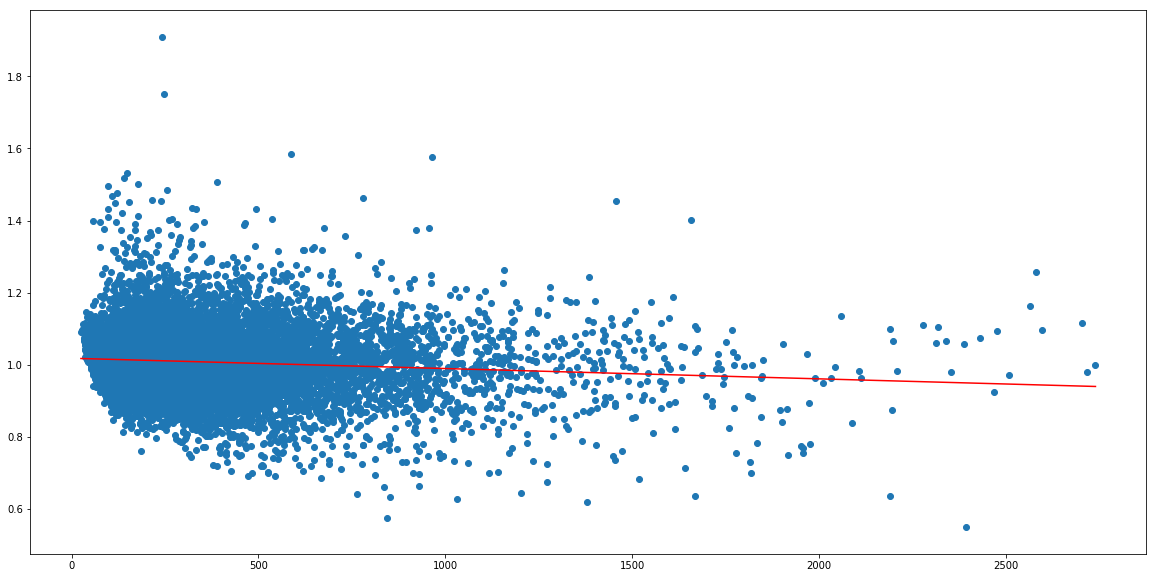

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

plt.show()